Train / Val loss:
Epoch: 72
---------------------------------
total
Train: 1.7213206594925545
Val: 2.2519523909336105
kl
Train: 0.7880803078558017
Val: 0.7711530154978735
element
Train: 0.3830178787170113
Val: 0.5151601486657498
wyckoff_letter
Train: 0.04021515326759328
Val: 0.12969311462928262
wyckoff_multiplier
Train: 0.02861042962862115
Val: 0.0719251406968698
disordered_site
Train: 0.014404159684702739
Val: 0.015696103756244365
frac_coords
Train: 0.18118705128120371
Val: 0.18039093920465052
space_group
Train: 0.11973054973423948
Val: 0.4322351760412814
lattice
Train: 0.16607456840771764
Val: 0.13569829590927215
---------------------------------


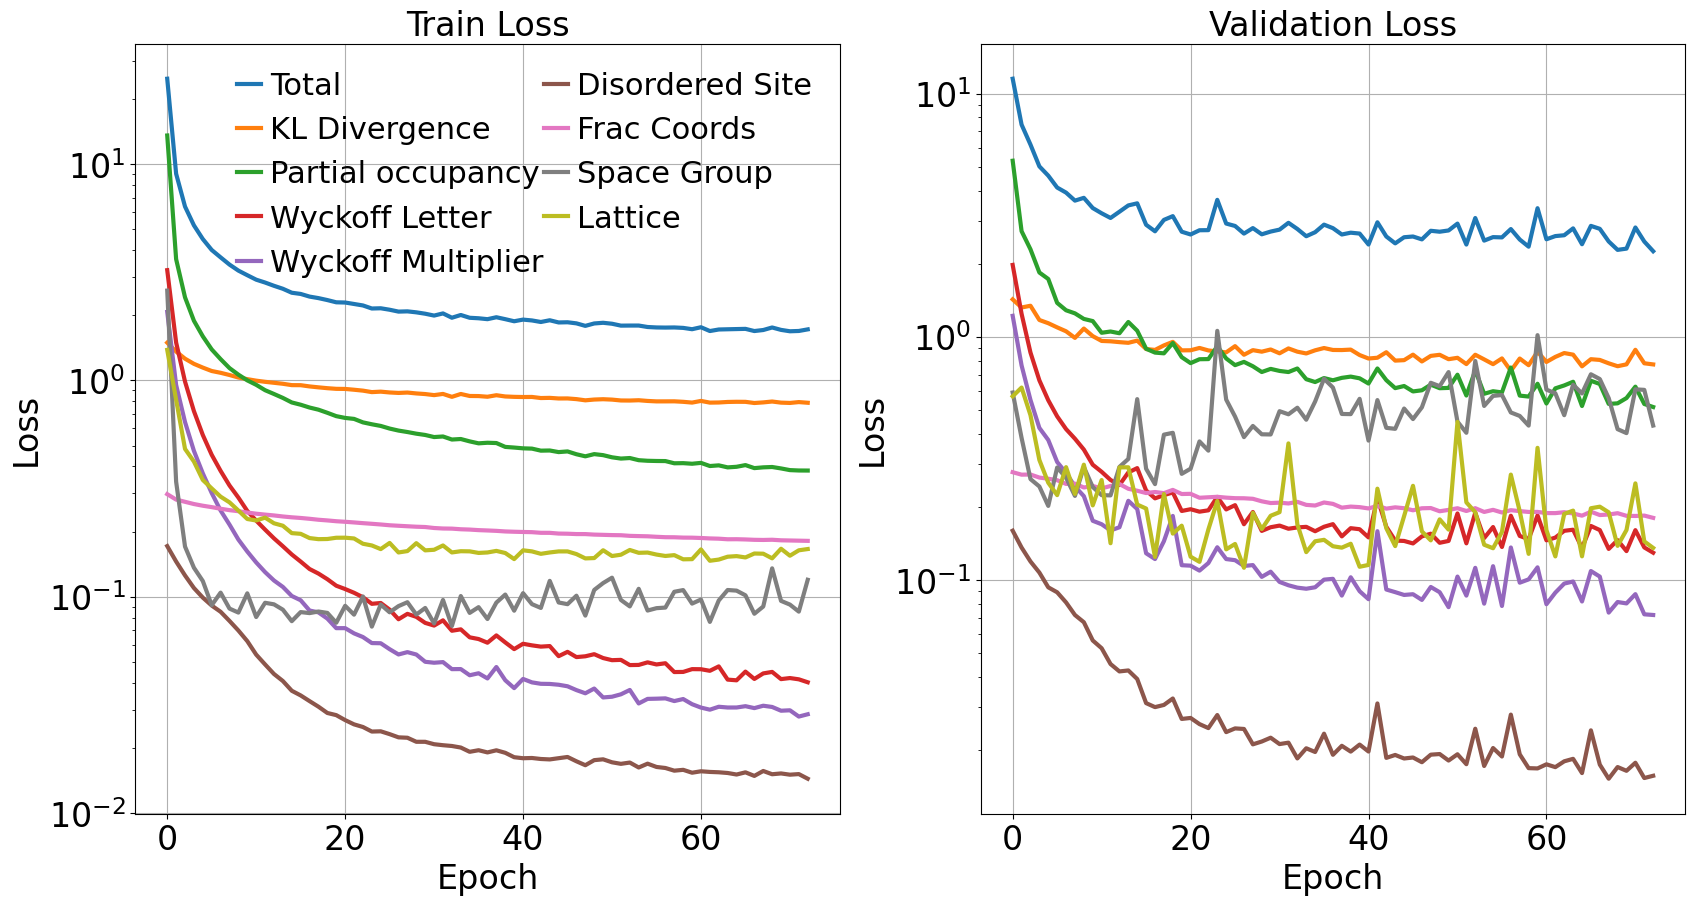

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os

# Load the VAE model
#model_dir = 'New_Kl5_ICSD_dis_site_middle_KL_element1000_lr_5e-06_epochs_2500_batch_64_test_0.2_val_0.1'
model_dir = 'ICSD_dis_site_lowlr'
best_model = True

if best_model:
    vae_dict = torch.load(model_dir+'/best_vae_model.pth',map_location=torch.device('cpu'))
else: # use exit model
    vae_dict = torch.load(model_dir+'/exit_vae_model.pth',map_location=torch.device('cpu'))

## Plot all the losses as a function of the epoch
fig, ax = plt.subplots(1,2,figsize=(20,10))
font_size = 24
Nbins = 20
linewidth = 3
train_loss_dict = vae_dict['train_loss']
val_loss_dict = vae_dict['val_loss']

print('Train / Val loss:')
print('Epoch:' ,train_loss_dict['epoch'][-1])
print('---------------------------------')

label_name = {'total':'Total',
                'kl':'KL Divergence',
              'element':'Partial occupancy',
              'wyckoff_letter':'Wyckoff Letter',
              'wyckoff_multiplier':'Wyckoff Multiplier',
              'frac_coords':'Frac Coords',
              'space_group':'Space Group',
              'lattice':'Lattice',
              'disordered_site':'Disordered Site'}


for key in train_loss_dict:
    if key == 'epoch':
        continue
    print(key)
    print(f"Train: {train_loss_dict[key][-1]}")
    print(f"Val: {val_loss_dict[key][-1]}")
    ax[0].plot(train_loss_dict['epoch'],train_loss_dict[key],label=label_name[key],linewidth=linewidth)
    ax[1].plot(val_loss_dict['epoch'], val_loss_dict[key],label=key,linewidth=linewidth)
print('---------------------------------')

ax[0].set_xlabel('Epoch',fontsize=font_size)
ax[0].set_ylabel('Loss',fontsize=font_size)
ax[0].set_title('Train Loss',fontsize=font_size)
ax[0].tick_params(axis='both', which='major', labelsize=font_size)
ax[0].tick_params(axis='both', which='minor', labelsize=font_size)
ax[0].grid(True)
ax[0].set_yscale('log')
ax[0].legend(fontsize=font_size-2,ncol=2,frameon=False,handlelength=0.8,handletextpad=0.3,columnspacing=0)

ax[1].set_xlabel('Epoch',fontsize=font_size)
ax[1].set_ylabel('Loss',fontsize=font_size)
ax[1].set_title('Validation Loss',fontsize=font_size)
ax[1].tick_params(axis='both', which='major', labelsize=font_size)
ax[1].tick_params(axis='both', which='minor', labelsize=font_size)
ax[1].set_yscale('log')
ax[1].grid(True)
#ax[1].legend(fontsize=font_size)